### British Airways Project

## Overview 
The goal of this project is to learn about British Airways customers reviews of the airline. 
I will scrap a review website to look at how their customers reviewed the airline and try and 
gain insights to understand the customers. 

In [2]:
# import packages 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize 
import seaborn as sns

In [3]:
# Scrap the web
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways'
pages = 20
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f'scrapping page {i}')
    
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    # Collect HTML data from this page
    response = requests.get(url)
    
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
        
    print(f"   ---> {len(reviews)} total reviews")


scrapping page 1
   ---> 100 total reviews
scrapping page 2
   ---> 200 total reviews
scrapping page 3
   ---> 300 total reviews
scrapping page 4
   ---> 400 total reviews
scrapping page 5
   ---> 500 total reviews
scrapping page 6
   ---> 600 total reviews
scrapping page 7
   ---> 700 total reviews
scrapping page 8
   ---> 800 total reviews
scrapping page 9
   ---> 900 total reviews
scrapping page 10
   ---> 1000 total reviews
scrapping page 11
   ---> 1100 total reviews
scrapping page 12
   ---> 1200 total reviews
scrapping page 13
   ---> 1300 total reviews
scrapping page 14
   ---> 1400 total reviews
scrapping page 15
   ---> 1500 total reviews
scrapping page 16
   ---> 1600 total reviews
scrapping page 17
   ---> 1700 total reviews
scrapping page 18
   ---> 1800 total reviews
scrapping page 19
   ---> 1900 total reviews
scrapping page 20
   ---> 2000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Credit to BA - Flew to Sin...
1,✅ Trip Verified | The check in area for prem...
2,✅ Trip Verified | The flight took off a littl...
3,✅ Trip Verified | BA is great in the air! But....
4,✅ Trip Verified | I had broken my leg 2 days ...


In [5]:
df.describe

<bound method NDFrame.describe of                                                 reviews
0     ✅ Trip Verified |   Credit to BA - Flew to Sin...
1     ✅ Trip Verified |   The check in area for prem...
2     ✅ Trip Verified |  The flight took off a littl...
3     ✅ Trip Verified | BA is great in the air! But....
4     ✅ Trip Verified |  I had broken my leg 2 days ...
...                                                 ...
1995  ✅ Verified Review |  London Heathrow to Moscow...
1996  ✅ Verified Review | London Gatwick to Barbados...
1997  ✅ Verified Review | Flew British Airways from ...
1998  Flew from Miami to London. First time on the A...
1999  Flew British Airways from London to Baltimore....

[2000 rows x 1 columns]>

In [6]:
df.to_csv("BA_reviews.csv")

In [7]:
# clean the data and remove words that are not needed. This cell was updated throughout to remove words that came up in 
# the analysis that I beleive are not helpful in understanding the customers.
for column in df:
    df['reviews'] = df['reviews'].map(lambda x: x.replace('✅ Trip Verified |',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('Not Verified |',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('✅ Verified Review | ',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('.',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace(',',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('"',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('?',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('!',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('(',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace(')',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('n\'t',' not'))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('-',' not'))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('’',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('get',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('would',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('one',''))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('ba','british-airways'))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('notairways','not airways'))
    df['reviews'] = df['reviews'].map(lambda x: x.replace('British Airways','british-airways'))
    df['reviews'] = df['reviews'].map(lambda x: x.lower())
    df.to_csv('BA_reviews_cleaned.csv',index=False)
    

In [8]:
df.head()

,reviews
0,credit to ba not flew to singapore recentl...
1,the check in area for premium classes at ga...
2,the flight took off a little late due to hea...
3,ba is great in the air but they sell you conn...
4,i had broken my leg 2 days before our return...


In [9]:
df = pd.read_csv('BA_reviews_cleaned.csv')

In [10]:
df.head()

,reviews
0,credit to ba not flew to singapore recentl...
1,the check in area for premium classes at ga...
2,the flight took off a little late due to hea...
3,ba is great in the air but they sell you conn...
4,i had broken my leg 2 days before our return...


## EDA

In [11]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kolegraham/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
# Create a list of revies from the DataFrame 
reviews_list = list(df['reviews'])
reviews_list[:5]

['\xa0 \xa0credit to ba  not flew to singapore recently and also british-airwaysck from doha to london and both experiences were great service was fantastic as was the quality of the food entertainment and was left feeling ba have got it toher after a few previous below average experiences you definitely notice the difference with the staff on ba  not far more approachable and outgoing compared to the cold and corporate middle eastern airline crews nice  ba for 2 great flights',
 '\xa0 \xa0the check in area for premium classes at gatwick is very nice and there was no queue when i arrived so i was able to drop my british-airwaysg very quickly premium security at gatwick is fine the flight was delayed due to nats issues but the member of staff on arriving at the lounge let me know of this the lounge is nicevand it very comfortable there was an excellent range of food and drinks all the drinks you  expect food wise there were sandwiches soup pasta salads fruit spanish stew as well as turk

In [37]:
# list to store the scores in
scores_combined = []
# itterate through the reviews to score the sentimate of the review. Print the review and the scores for a quick check. 
for reviews in reviews_list:
    scores = analyzer.polarity_scores(reviews)
    print(reviews[:5])
    print(scores)
    # add the scores to the list
    scores_combined.append(scores)

   cr
{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.9768}
   th
{'neg': 0.079, 'neu': 0.693, 'pos': 0.228, 'compound': 0.998}
  the
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.9516}
 ba i
{'neg': 0.041, 'neu': 0.897, 'pos': 0.063, 'compound': 0.2382}
  i h
{'neg': 0.039, 'neu': 0.896, 'pos': 0.065, 'compound': 0.7992}
 chec
{'neg': 0.136, 'neu': 0.672, 'pos': 0.193, 'compound': 0.431}
   ne
{'neg': 0.118, 'neu': 0.845, 'pos': 0.037, 'compound': -0.6729}
  hav
{'neg': 0.084, 'neu': 0.847, 'pos': 0.069, 'compound': -0.2349}
 dear
{'neg': 0.132, 'neu': 0.789, 'pos': 0.079, 'compound': -0.9641}
  qui
{'neg': 0.034, 'neu': 0.645, 'pos': 0.321, 'compound': 0.9908}
  4 h
{'neg': 0.185, 'neu': 0.744, 'pos': 0.071, 'compound': -0.9342}
  i r
{'neg': 0.136, 'neu': 0.783, 'pos': 0.081, 'compound': -0.85}
  boa
{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.5927}
  5 d
{'neg': 0.101, 'neu': 0.832, 'pos': 0.067, 'compound': -0.8042}
  
w
{'neg': 0.0, 'neu': 0.926, 'pos': 0

In [17]:
# create a DataFrame of the scores
df_scores = pd.DataFrame(scores_combined)
df_scores.head()

,neg,neu,pos,compound
0,0.000,0.718,0.282,0.9768
1,0.079,0.693,0.228,0.9980
2,0.000,0.761,0.239,0.9516
3,0.041,0.897,0.063,0.2382
4,0.039,0.896,0.065,0.7992


In [18]:
# join the dataframe scores to the original dataframe
df = df.join(df_scores)
df.head()

,reviews,neg,neu,pos,compound
0,credit to ba not flew to singapore recentl...,0.000,0.718,0.282,0.9768
1,the check in area for premium classes at ga...,0.079,0.693,0.228,0.9980
2,the flight took off a little late due to hea...,0.000,0.761,0.239,0.9516
3,ba is great in the air but they sell you conn...,0.041,0.897,0.063,0.2382
4,i had broken my leg 2 days before our return...,0.039,0.896,0.065,0.7992


In [19]:
df.describe()

,neg,neu,pos,compound
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.083094,0.814809,0.102107,0.068032
std,0.054601,0.073309,0.080456,0.776373
min,0.000000,0.436000,0.000000,-0.997300
25%,0.045000,0.773000,0.046000,-0.778300
50%,0.076000,0.821000,0.083000,0.156500
75%,0.113000,0.866000,0.140000,0.898700
max,0.323000,1.000000,0.495000,0.999100


In [20]:
df.describe

<bound method NDFrame.describe of                                                 reviews    neg    neu    pos  \
0        credit to ba  not flew to singapore recentl...  0.000  0.718  0.282   
1        the check in area for premium classes at ga...  0.079  0.693  0.228   
2       the flight took off a little late due to hea...  0.000  0.761  0.239   
3      ba is great in the air but they sell you conn...  0.041  0.897  0.063   
4       i had broken my leg 2 days before our return...  0.039  0.896  0.065   
...                                                 ...    ...    ...    ...   
1995   london heathrow to moscow with british-airway...  0.026  0.761  0.213   
1996  london gatwick to barbritish-airwaysdos with b...  0.061  0.871  0.068   
1997  flew british-airways from johannesburg to lond...  0.162  0.768  0.070   
1998  flew from miami to london first time on the a3...  0.029  0.836  0.134   
1999  flew british-airways from london to baltimore ...  0.050  0.733  0.217   

     

In [21]:
def tokenize(column):
    """
    Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [word, word, word]
    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

In [22]:
df['tokenized'] = df.apply(lambda x: tokenize(x['reviews']), axis=1)
df[['tokenized']].head()

,tokenized
0,"[credit, to, ba, not, flew, to, singapore, rec..."
1,"[the, check, in, area, for, premium, classes, ..."
2,"[the, flight, took, off, a, little, late, due,..."
3,"[ba, is, great, in, the, air, but, they, sell,..."
4,"[i, had, broken, my, leg, days, before, our, r..."


In [23]:
df.head()

,reviews,neg,neu,pos,compound,tokenized
0,credit to ba not flew to singapore recentl...,0.000,0.718,0.282,0.9768,"[credit, to, ba, not, flew, to, singapore, rec..."
1,the check in area for premium classes at ga...,0.079,0.693,0.228,0.9980,"[the, check, in, area, for, premium, classes, ..."
2,the flight took off a little late due to hea...,0.000,0.761,0.239,0.9516,"[the, flight, took, off, a, little, late, due,..."
3,ba is great in the air but they sell you conn...,0.041,0.897,0.063,0.2382,"[ba, is, great, in, the, air, but, they, sell,..."
4,i had broken my leg 2 days before our return...,0.039,0.896,0.065,0.7992,"[i, had, broken, my, leg, days, before, our, r..."


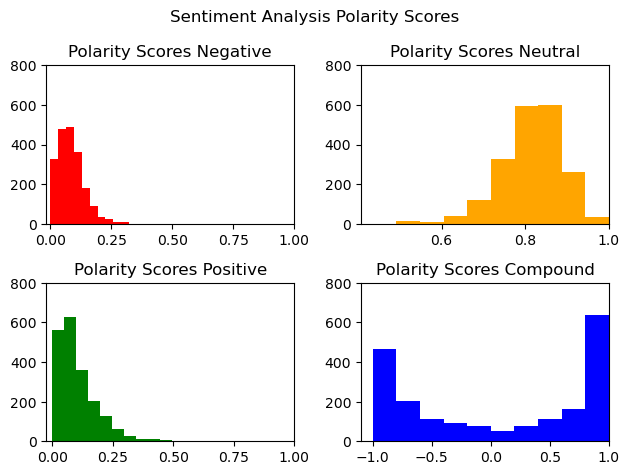

In [24]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2)
ax1.hist(x= df['neg'], color = 'red',)
ax1.set_title('Polarity Scores Negative')
ax2.hist(x=df['neu'],color = 'orange')
ax2.set_title('Polarity Scores Neutral')
ax3.hist(x=df['pos'],color = 'green')
ax3.set_title('Polarity Scores Positive')
ax4.hist(x=df['compound'],color = 'blue')
ax4.set_title('Polarity Scores Compound')
fig.suptitle('Sentiment Analysis Polarity Scores')
ax1.set_ylim(ymax=800)
ax1.set_xlim(xmax=1.0)
ax2.set_ylim(ymax=800)
ax2.set_xlim(xmax=1.0)
ax3.set_ylim(ymax=800)
ax3.set_xlim(xmax=1.0)
ax4.set_ylim(ymax=800)
ax4.set_xlim(xmax=1.0)
fig.tight_layout();

In [25]:
df['compound'].mean()

0.06803225

In [34]:
# Tokenize the text in the 'text_column'
tokenized_text = [word.lower() for text in df['reviews'] for word in word_tokenize(str(text))]
# remove stop words
import nltk
stopwords = nltk.corpus.stopwords.words('english')
tokenized_cleaned = [x for x in tokenized_text if x not in stopwords]
print(tokenized_cleaned[:5])


['credit', 'ba', 'flew', 'singapore', 'recently']


In [27]:
from nltk.probability import FreqDist
# Calculate the frequency distribution using FreqDist
freq_dist = FreqDist(tokenized_cleaned)

# Print the most common words and their frequencies
print(freq_dist.most_common(20))

[('flight', 3770), ('ba', 2646), ('service', 1597), ('london', 1455), ('food', 1167), ('seat', 1156), ('crew', 1066), ('time', 1061), ('class', 1000), ('british-airways', 973), ('seats', 964), ('cabin', 944), ('good', 928), ('business', 870), ('heathrow', 865), ('staff', 860), ('airline', 711), ('check', 708), ('economy', 708), ('us', 686)]


In [28]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = (FreqDist(tokenized_cleaned))
fdist

FreqDist({'flight': 3770, 'ba': 2646, 'service': 1597, 'london': 1455, 'food': 1167, 'seat': 1156, 'crew': 1066, 'time': 1061, 'class': 1000, 'british-airways': 973, ...})

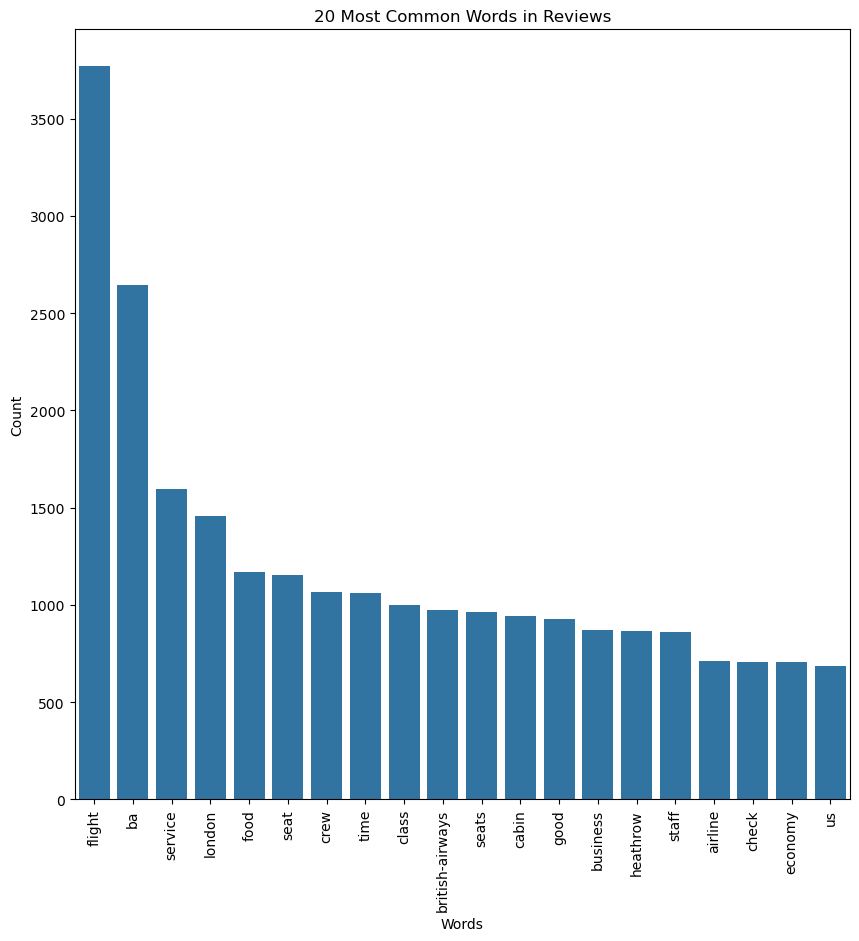

In [29]:
all_fdist = pd.Series(dict(fdist.most_common(20)))
fig, ax =plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('20 Most Common Words in Reviews');

In [30]:
! pip install nbconvert[webpdf]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 994.6 kB/s eta 0:00:00 0:00:01
  Attempting uninstall: pyee
    Found existing installation: pyee 8.2.2
    Uninstalling pyee-8.2.2:
      Successfully uninstalled pyee-8.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyppeteer 1.0.2 requires pyee<9.0.0,>=8.1.0, but you have pyee 11.0.1 which is incompatible.


In [38]:
! jupyter nbconvert --to webpdf --no-input British_Airways_project.ipynb

[NbConvertApp] Converting notebook British_Airways_project.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 758353 bytes to British_Airways_project.pdf
